<a href="https://colab.research.google.com/github/Aravind45code/Primitive-Neuron/blob/main/MP_NEURONandPERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading dataset

In [ ]:
import sklearn.datasets
import numpy as np

In [ ]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [ ]:
X=breast_cancer.data
Y=breast_cancer.target

In [ ]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [ ]:

import pandas as pd

In [ ]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [ ]:
data["class"]=breast_cancer.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
print(data["class"].value_counts())

1    357
0    212
Name: class, dtype: int64


In [ ]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
data.groupby("class").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#train test split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop("class",axis=1)
Y=data["class"]

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [ ]:

print(X.shape,X_train.shape,X_test.shape)

(569, 30) (426, 30) (143, 30)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (512, 30) (57, 30)


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(569,) (512,) (57,)


In [ ]:
print(Y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.6140350877192983 0.62890625


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [ ]:
print(X.mean(),X_test.mean(),X_train.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

#Binarisation of input

In [ ]:
import matplotlib.pyplot as plt

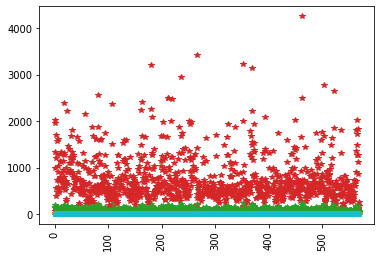

In [ ]:

plt.plot(X_train,"*")
plt.xticks(rotation="vertical")
plt.show()

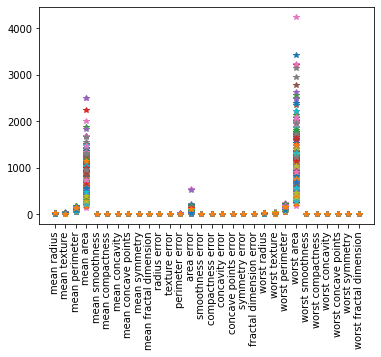

In [ ]:
plt.plot(X_train.T,"*")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
 X_binarised_3_train=X_train['mean area'].map(lambda x: 0 if x<1000 else 1)

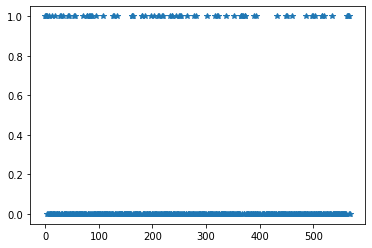

In [ ]:
plt.plot(X_binarised_3_train,"*")
##plt.plot(X_binarised_3_train.T,"*")

In [ ]:
X_binarised_train=X_train.apply(pd.cut,bins=2,labels=[1,0])

In [ ]:
print(X_binarised_train.shape)

(512, 30)


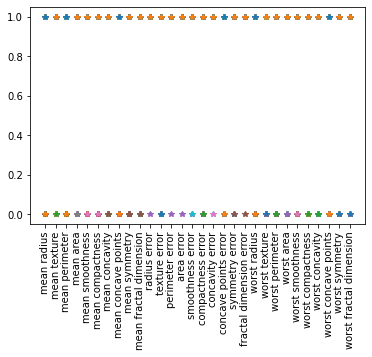

In [ ]:
plt.plot(X_binarised_train.T,"*")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_test=X_test.apply(pd.cut,bins=2,labels=[1,0])

In [ ]:
X_binarised_train=X_binarised_train.values
X_binarised_test=X_binarised_test.values

In [ ]:
type(Y_train)


pandas.core.series.Series

#MP neuron model

In [ ]:
b=3
from random import randint
i=randint(0,X_binarised_train.shape[0])
print("for row ",i)
if(np.sum(X_binarised_train[i,:])>=b):
  print("mp neuron inference is malignant")
else:
  print("inference benign")
if(Y_train[i]==1):
  print("ground truth is malignant")
else:
  print("ground truth id benign")


for row  91
mp neuron inference is malignant
ground truth id benign


In [ ]:
b=3
Y_pred_train=[]
accurate_rows=0
for x,y in zip(X_binarised_train,Y_train):
  y_pred=(np.sum(x)>=b)
  Y_pred_train.append(y_pred)
  accurate_rows+=(y==y_pred)
print(accurate_rows,accurate_rows/X_binarised_train.shape[0])


321 0.626953125


In [ ]:
for b in range(X_binarised_train.shape[1]+1):



  Y_pred_train=[]
  accurate_rows=0
  for x,y in zip(X_binarised_train,Y_train):

    y_pred=(np.sum(x)>=b)
    Y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)
  print(b,accurate_rows/X_binarised_train.shape[0])


0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [ ]:

from sklearn.metrics import accuracy_score


In [ ]:

b=28


Y_pred_test=[]
accurate_rows=0
for x in X_binarised_test:

    y_pred=(np.sum(x)>=b)
    Y_pred_test.append(y_pred)
accuracy=accuracy_score(Y_pred_test,Y_test)
print(b,accuracy)


28 0.7894736842105263


#MP neuron class

In [ ]:
class MPneuron:
  def __init__(self):
    self.b=None
  def model(self,x):
    return(sum(x) >= self.b)
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
  def fit(self,X,Y):
    accuracy={}
    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      accuracy[b]=accuracy_score(Y_pred,Y)
    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b
    print("optimal b  is",best_b)
    print("highest accuracy is",accuracy[best_b])


In [ ]:
mp_neuron=MPneuron()
mp_neuron.fit(X_binarised_train, Y_train)

optimal b  is 28
highest accuracy is 0.849609375


In [ ]:
Y_test_predict=mp_neuron.predict(X_binarised_test)
accuracy_test=accuracy_score(Y_test_predict,Y_test)

In [ ]:
print(accuracy_test)
print(X_train)

0.7894736842105263
     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
430       14.900         22.53  ...          0.2866                  0.11550
48        12.050         14.63  ...          0.2747                  0.08301
105       13.110         15.56  ...          0.3147                  0.14050
467        9.668         18.10  ...          0.3057                  0.07875
547       10.260         16.58  ...          0.2691                  0.09479
..           ...           ...  ...             ...                      ...
201       17.540         19.32  ...          0.2928                  0.07867
183       11.410         14.92  ...          0.1811                  0.07427
285       12.580         18.40  ...          0.2505                  0.06431
49        13.490         22.30  ...          0.2871                  0.06917
161       19.190         15.94  ...          0.2443                  0.06251

[512 rows x 30 columns]


Perceptron class

In [ ]:
class Perceptron:
  def __init__(self):
    self.w=None
    self.b=None

  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epochs=2,lr=1):
    self.w=np.ones(X.shape[1])
    self.b=0
    accuracy={}
    max_accuracy=0
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if y==1 and y_pred==0:
          self.w=self.w+lr*x
          self.b=self.b+lr*1
        elif y==0 and y_pred==1:
          self.w=self.w-lr*x
          self.b=self.b-lr*1
      accuracy[i]=accuracy_score(self.predict(X),Y)
      if(accuracy[i]>max_accuracy):
         max_accuracy=accuracy[i]
         chkptw=self.w
         chkptb=self.b
      self.w=chkptw
      self.b=chkptb
    print(max_accuracy)
    plt.plot(list(accuracy.values()))
    plt.show()





    
    
    

  
   
   


In [ ]:
perceptron=Perceptron()

In [ ]:
type(X_train)

numpy.ndarray

0.869140625


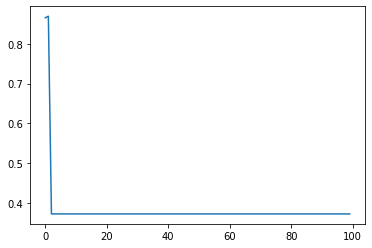

In [ ]:
perceptron.fit(X_train,Y_train,100,0.001)

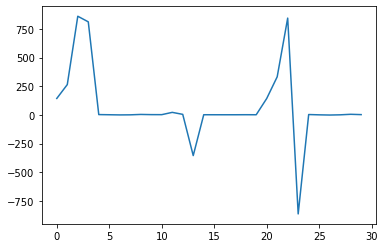

In [ ]:
plt.plot(perceptron.w)
plt.show()

In [ ]:
Y_pred_train=perceptron.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.908203125


In [ ]:
Y_pred_test=perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.9473684210526315


In [ ]:
Y_pred_test=perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.9473684210526315


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris=load_iris()

In [ ]:
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(int)

In [ ]:
per_clf=Perceptron()
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred=per_clf.predict([[2,0.5]])

In [ ]:
y_pred

array([0])